# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
cities =  cities 
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q=" 
# set up lists to hold reponse info

# set up lists to hold reponse info
lat = []
lng = []
temp_max = []
humidity = []
wind_speed = []
date = []
cloudiness = []
country = []
city_new = []
# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        date.append(response['sys']['sunset'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        city_new.append(response['name'])
    except: KeyError
    pass



In [4]:
weather_dict = {"City": city_new, "Cloudiness": cloudiness, "Country": country, "Date": date, "Humidity": humidity, 
               "Lat": lat, "Lng": lng, "Max Temp": temp_max, "Wind Speed": wind_speed}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Butaritari,100,KI,1580020817,72,3.07,172.79,29.73,4.42
1,Rondonopolis,98,BR,1579990665,88,-16.47,-54.64,23.24,0.86
2,Pecos,1,US,1579998098,21,31.42,-103.49,17.00,5.10
3,Sangar,0,RU,1580021716,92,63.92,127.47,-37.61,2.16
4,Dikson,100,RU,0,95,73.51,80.55,-21.02,2.41


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

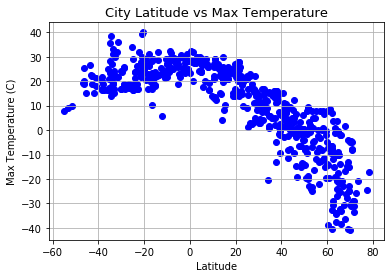

In [5]:
title = f"City Latitude vs Max Temperature"
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker = "o", color="blue")
plt.title(title, size=13)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)
plt.savefig(f"{title}.png")

#### Latitude vs. Humidity Plot

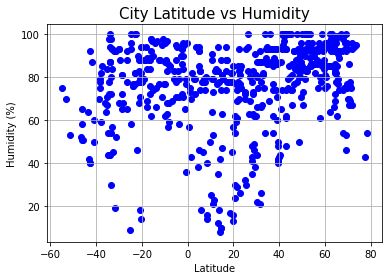

In [6]:
title = "City Latitude vs Humidity"
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker = "o", color="blue")
plt.title(title, size=15)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.savefig(f"{title}.png")

#### Latitude vs. Cloudiness Plot

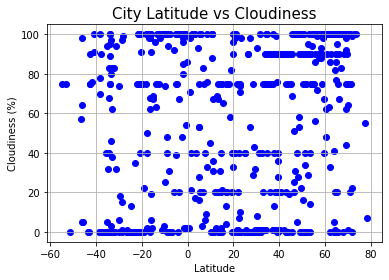

In [7]:
title = "City Latitude vs Cloudiness"
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker = "o", color="blue")
plt.title(title, size=15)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.savefig(f"{title}.png")

#### Latitude vs. Wind Speed Plot

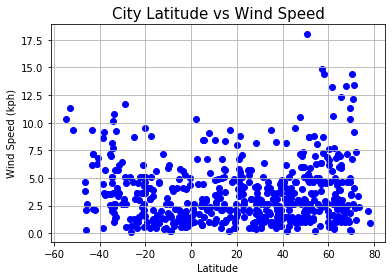

In [8]:
title = "City Latitude vs Wind Speed"
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker = "o", color="blue")
plt.title(title, size=15)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (kph)")
plt.grid(True)
plt.savefig(f"{title}.png")

## Linear Regression

In [9]:
weather_dataN = weather_data.drop(weather_data[weather_data["Lat"] <= 0].index)
weather_dataS = weather_data.drop(weather_data[weather_data["Lat"]>0].index)

The r-squared is: -0.8576064092907878


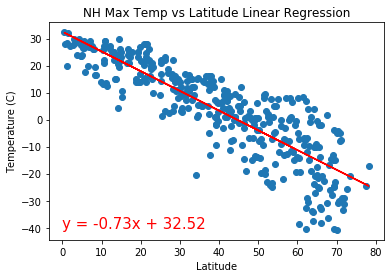

In [10]:
title = "NH Max Temp vs Latitude Linear Regression"
x = weather_dataN["Lat"]
y = weather_dataN["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(0,-40),fontsize=15,color="red")
plt.title(title)
plt.xlabel('Latitude')
plt.ylabel("Temperature (C)")
plt.savefig(f"{title}.png")
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4050570828965713


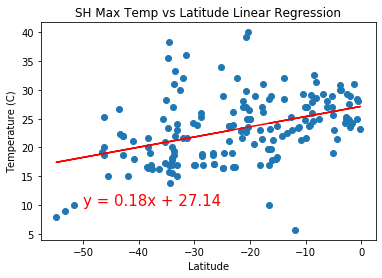

In [12]:
title = "SH Max Temp vs Latitude Linear Regression"
x = weather_dataS["Lat"]
y = weather_dataS["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.title(title)
plt.xlabel('Latitude')
plt.ylabel("Temperature (C)")
plt.savefig(f"{title}.png")
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.40423154704232733


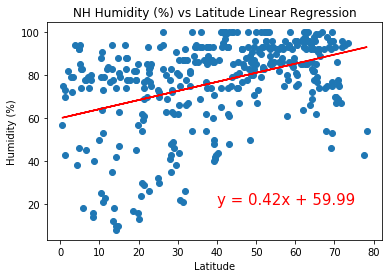

In [14]:
title = "NH Humidity (%) vs Latitude Linear Regression"
x = weather_dataN["Lat"]
y = weather_dataN["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.title(title)
plt.xlabel('Latitude')
plt.ylabel("Humidity (%)")
plt.savefig(f"{title}.png")
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2964064046222157


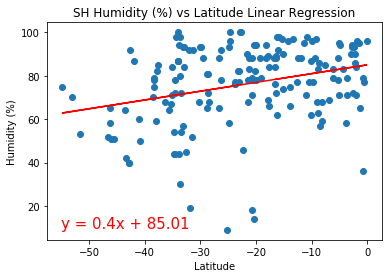

In [20]:
title = "SH Humidity (%) vs Latitude Linear Regression"
x = weather_dataS["Lat"]
y = weather_dataS["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-55,10),fontsize=15,color="red")
plt.title(title)
plt.xlabel('Latitude')
plt.ylabel("Humidity (%)")
plt.savefig(f"{title}.png")
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.3181605483771751


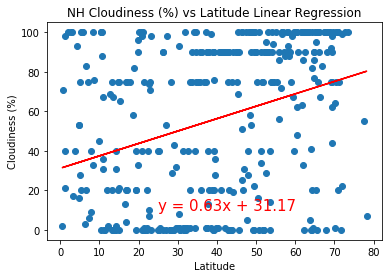

In [22]:
title = "NH Cloudiness (%) vs Latitude Linear Regression"
x = weather_dataN["Lat"]
y = weather_dataN["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(25,10),fontsize=15,color="red")
plt.title(title)
plt.xlabel('Latitude')
plt.ylabel("Cloudiness (%)")
plt.savefig(f"{title}.png")
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.18378255696514462


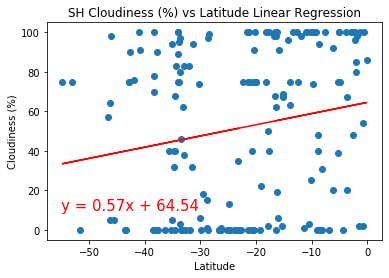

In [21]:
title = "SH Cloudiness (%) vs Latitude Linear Regression"
x = weather_dataS["Lat"]
y = weather_dataS["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-55,10),fontsize=15,color="red")
plt.title(title)
plt.xlabel('Latitude')
plt.ylabel("Cloudiness (%)")
plt.savefig(f"{title}.png")
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1576282735590847


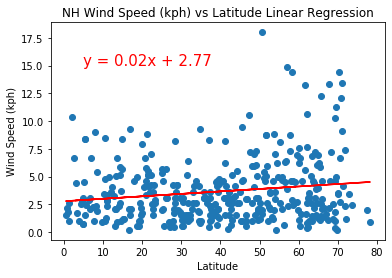

In [23]:
title = "NH Wind Speed (kph) vs Latitude Linear Regression"
x = weather_dataN["Lat"]
y = weather_dataN["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(5,15),fontsize=15,color="red")
plt.title(title)
plt.xlabel('Latitude')
plt.ylabel("Wind Speed (kph)")
plt.savefig(f"{title}.png")
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.4204266621823174


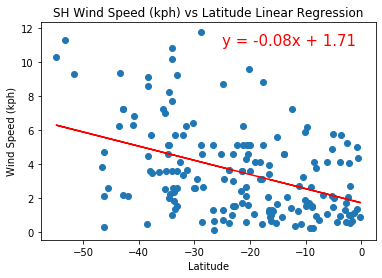

In [24]:
title = "SH Wind Speed (kph) vs Latitude Linear Regression"
x = weather_dataS["Lat"]
y = weather_dataS["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-25,11),fontsize=15,color="red")
plt.title(title)
plt.xlabel('Latitude')
plt.ylabel("Wind Speed (kph)")
plt.savefig(f"{title}.png")
print(f"The r-squared is: {rvalue}")
plt.show()